In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Setting the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [3]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Type of Features in the Dataset
* **Categorical** : Sex  , Embarked
* **Continuous**  : Age  , Fare
* **Discrete**   : SibSp, Parch
* **Alphanumaric**: Cabin, Ticket

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Null values in our dataset
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numarical Value Analysis

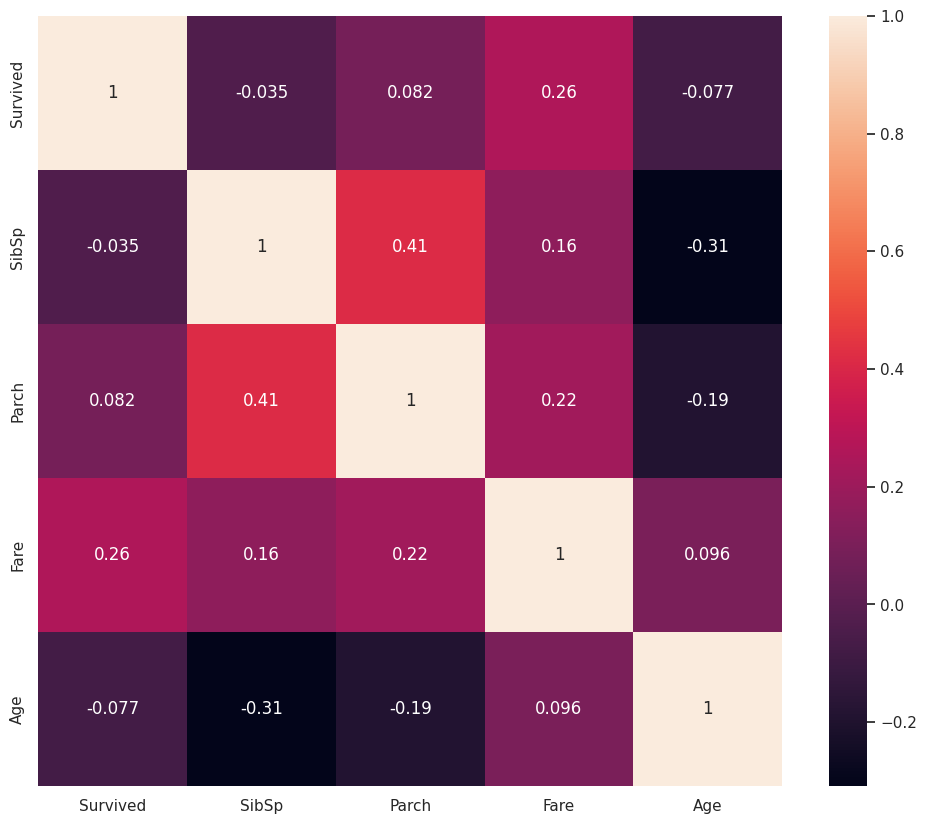

In [7]:
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(df_train[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)

### SibSp : No of siblings/spouses aboard the Titanic

In [8]:
# No of siblings that a passenger may have
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

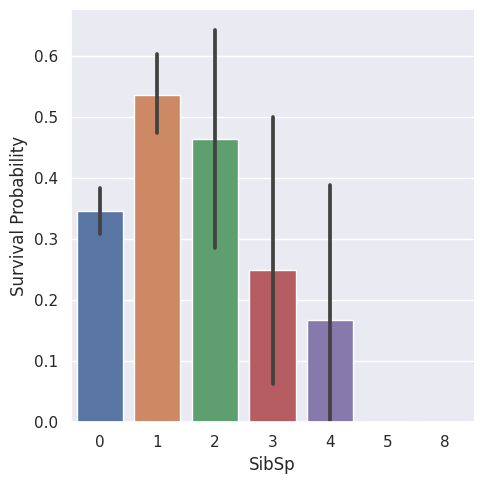

In [9]:
sns.catplot(x='SibSp',y='Survived',data=df_train,kind='bar').set_ylabels("Survival Probability")

We can observe that probability of survival of passenger having 1 or 2 sibling is higher.

### Age

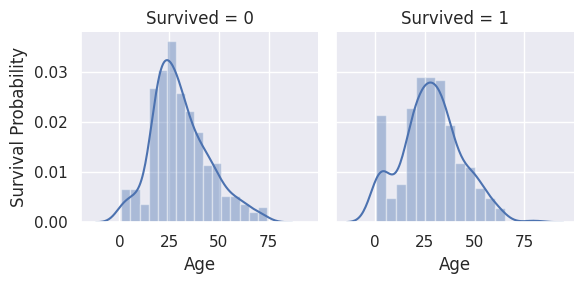

In [10]:
age_visual = sns.FacetGrid(df_train,col='Survived')
age_visual = age_visual.map(sns.distplot,"Age").set_ylabels("Survival Probability")

### Sex

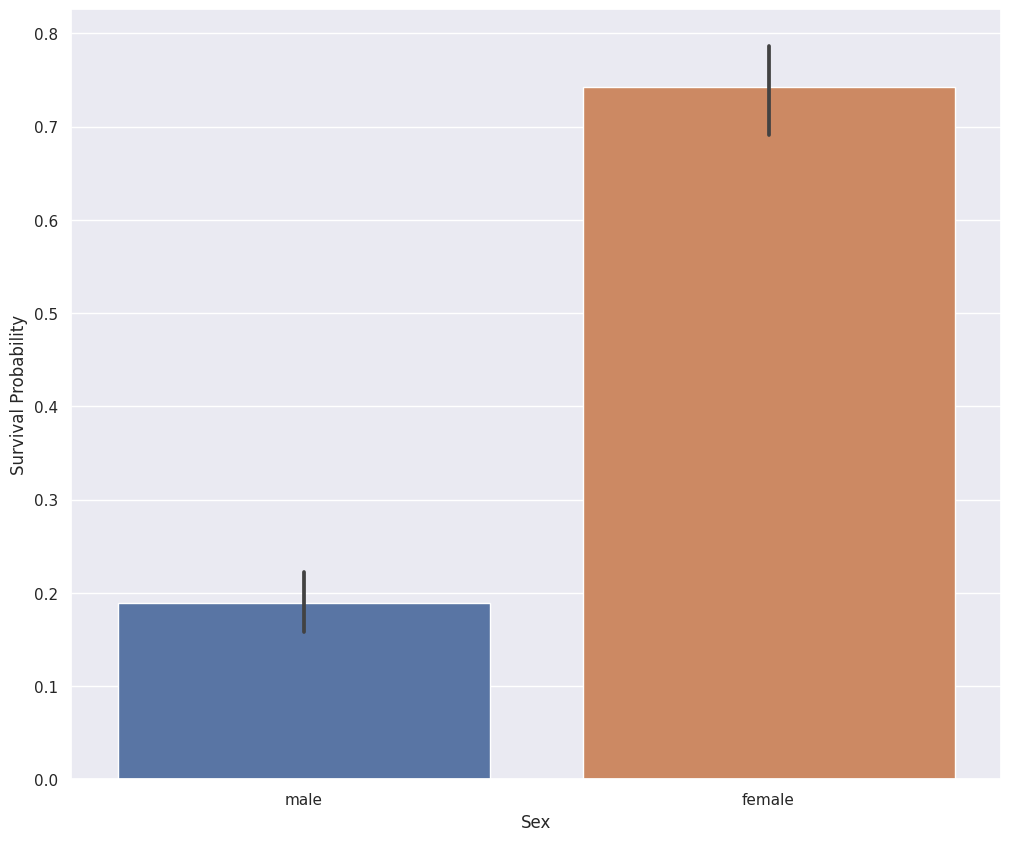

In [11]:
sns_plot = sns.barplot(x='Sex',y='Survived',data=df_train).set_ylabel("Survival Probability")

In [12]:
df_train[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


We can observe that Females have a greater chances of survival.

### PClass

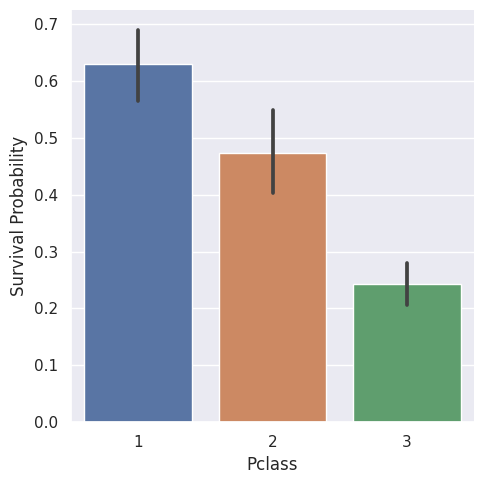

In [13]:
pclass = sns.catplot(x="Pclass",y="Survived",data=df_train,kind='bar')
pclass = pclass.set_ylabels("Survival Probability")

Passengers belonging to 1st class have higher chances of survival.

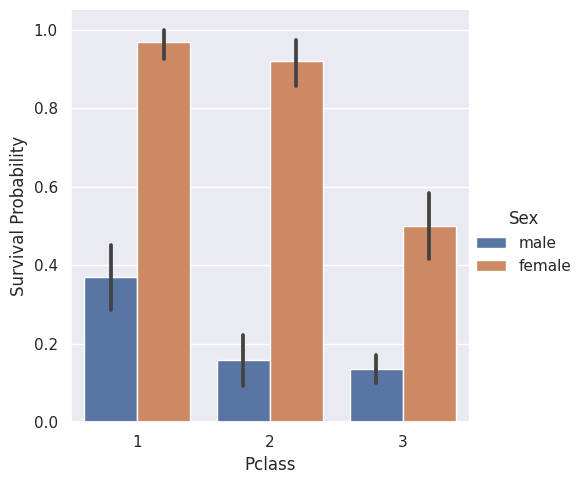

In [14]:
pclass = sns.catplot(x="Pclass",y="Survived",data=df_train,kind='bar',hue='Sex')
pclass = pclass.set_ylabels("Survival Probability")

### Embarked
Whether the station from which the person has started the journey has any impact on its survival.

In [15]:
df_train["Embarked"].isnull().sum()

2

In [16]:
df_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
# Fill the null values with 'S' since it is majority
df_train["Embarked"] = df_train["Embarked"].fillna('S')

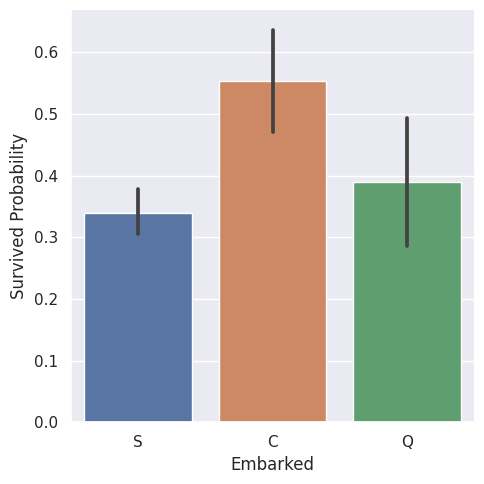

In [18]:
embark = sns.catplot(x='Embarked',y='Survived',data=df_train,kind='bar')
embark = embark.set_ylabels("Survived Probability")

Passengers from Cherbourg 'C' had a higher chance of survival.

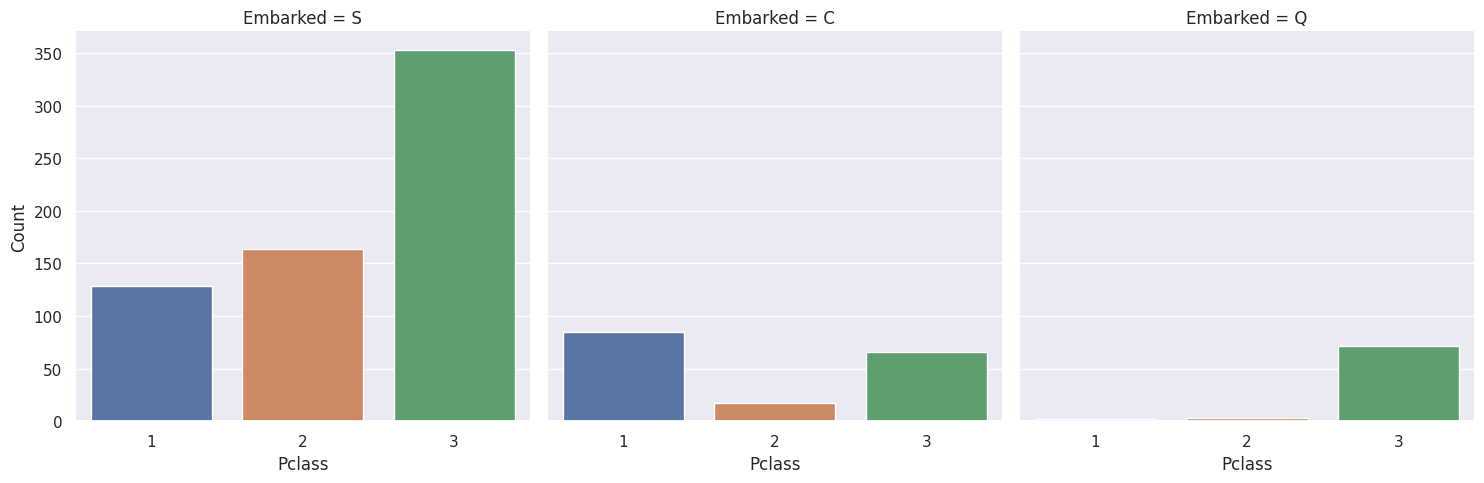

In [19]:
# Explore Pclass vs Embarked
embark_pclass = sns.catplot(x='Pclass',col='Embarked',data=df_train,kind='count')
embark_pclass.despine(left=True)
embark_pclass = embark_pclass.set_ylabels("Count")

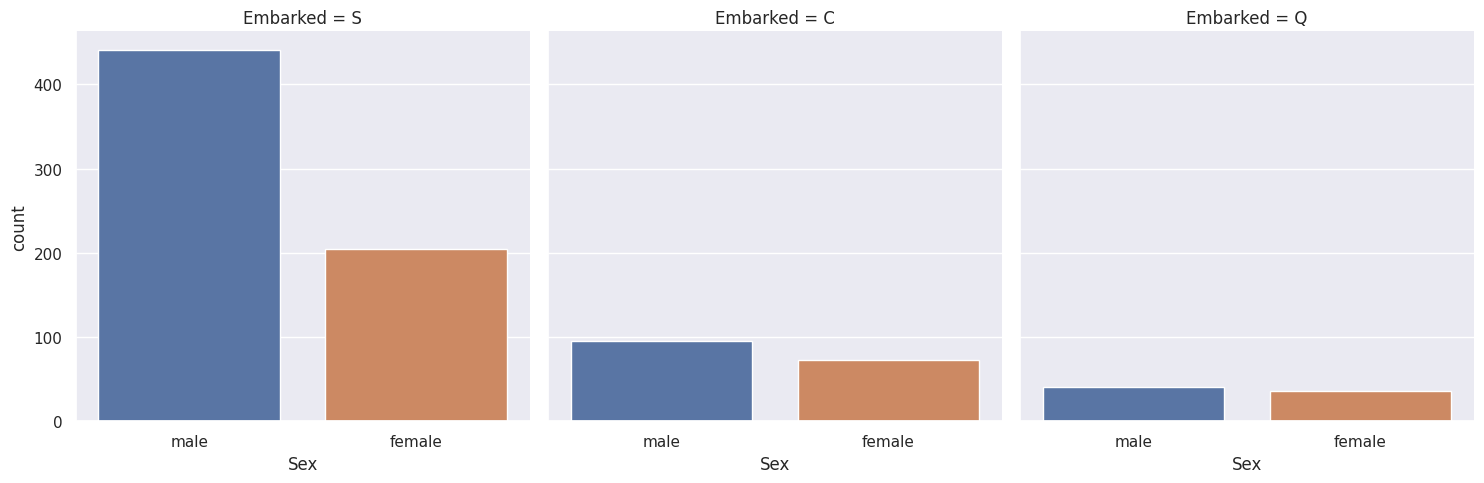

In [20]:
gender = sns.catplot(x='Sex',col='Embarked',data=df_train,kind='count')

Majority of Passengers who embarked from "Southampton" are Male that's why there survival rate is less.

### Preparing the Data

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Testing data do not have target column rest columns are same
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Removing the null values from age column

In [24]:
mean = df_train['Age'].mean()
std  = df_train["Age"].std() 
# Count of null value in "Age"
is_null = df_train["Age"].isnull().sum()

In [25]:
print("mean:",mean,"std:",std,"null_value count:",is_null)

mean: 29.69911764705882 std: 14.526497332334042 null_value count: 177


In [26]:
# Preparing 177 random age values in the range of mean-std and mean+std
rand_age = np.random.randint(mean-std,mean+std,size=is_null)

In [27]:
type(rand_age)

numpy.ndarray

In [28]:
dummy_age = df_train["Age"].copy()
# Wherever we have null values in "Age" column fill it with rand_age
dummy_age[np.isnan(dummy_age)] = rand_age
# Assign it back to original column
df_train["Age"] = dummy_age

In [29]:
df_train["Age"].isnull().sum()

0

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

#### Dropping Parameters that are not important

In [32]:
col_to_drop = ["PassengerId","Cabin","Name","Ticket"]
df_train.drop(col_to_drop,axis=1,inplace=True)

In [33]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
# Assigning categories to "Sex" parameter
genders = {"male":0,"female":1}
df_train["Sex"] = df_train["Sex"].map(genders)

In [35]:
# Similarly for Ports
ports = {'S':0,'C':1,'Q':2}
df_train["Embarked"] = df_train["Embarked"].map(ports)

In [36]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Handling Test Data

In [37]:
col_to_drop = ["PassengerId","Cabin","Name","Ticket"]
df_test.drop(col_to_drop,axis=1,inplace=True)

In [38]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [39]:
mean = df_test['Age'].mean()
std  = df_test["Age"].std() 
is_null = df_test["Age"].isnull().sum()

In [40]:
rand_age = np.random.randint(mean-std,mean+std,size=is_null)

In [41]:
dummy_age = df_test["Age"].copy()
dummy_age[np.isnan(dummy_age)] = rand_age
df_test["Age"] = dummy_age

In [42]:
mean_fare = df_test["Fare"].mean()

In [43]:
df_test["Fare"] = df_test["Fare"].fillna(mean_fare)

In [44]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
genders = {"male":0,"female":1}
df_test["Sex"] = df_test["Sex"].map(genders)

In [46]:
ports = {'S':0,'C':1,'Q':2}
df_test["Embarked"] = df_test["Embarked"].map(ports)

In [47]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


### Splitting the Data

In [48]:
x_train = df_train.drop(df_train.columns[[0]],axis=1)
y_train = df_train["Survived"]

### Scaling the Data

In [49]:
from sklearn.preprocessing import StandardScaler
sc_x =StandardScaler()
x_train = sc_x.fit_transform(x_train)

In [50]:
# Scaling the test data
x_test = sc_x.transform(df_test)

### Classification

In [51]:
logreg        = LogisticRegression()
svc_classifer = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier= KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [52]:
logreg.fit(x_train,y_train)
svc_classifer.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [53]:
logreg_ypred           = logreg.predict(x_test)
svc_classifier_ypred   = svc_classifer.predict(x_test)
dt_classifier_ypred    = dt_classifier.predict(x_test)
knn_classifier_ypred   = knn_classifier.predict(x_test)
rf_classifier_ypred    = rf_classifier.predict(x_test)

In [54]:
# To predict the performance of each model 
# from sklearn.metrics import accuracy_score

# logreg_acc           = accuracy_score(y_test,logreg_ypred)
# svc_classifier_acc   = accuracy_score(y_test,svc_classifer_ypred)
# dt_classifier_acc    = accuracy_score(y_test,dt_classifier_ypred)
# knn_classifier_acc   = accuracy_score(y_test,knn_classifier_ypred)
# rf_classifier_acc    = accuracy_score(y_test,rf_classifier_ypred)

In [55]:
df = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")